<a href="https://colab.research.google.com/github/mrzebest/AirCraftPrediction-/blob/main/PredictionAirCraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Data (Classification - Survive)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the file
excel_path = "/content/datascience/db_DataScience_HandsOn.xlsx"
classification_df = pd.read_excel(excel_path, sheet_name='Classification2')
# Save a copy in the Datalake
classification_df.to_csv(f"/content/datascience/classification_survive.csv", index=False)

# Preview
classification_df.head()


,passenger,class,pname,gender,age,fare,survived
0,1,3,"Braund, Mr. Owen Harris",M,22.0,7.25,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,712833.00,1
2,3,3,"Heikkinen, Miss. Laina",F,26.0,7925.00,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,53.10,1
4,5,3,"Allen, Mr. William Henry",M,35.0,8.05,0


In [ ]:
# inspect all sheet names in the Excel file to identify the correct name
xls = pd.ExcelFile("/content/datascience/db_DataScience_HandsOn.xlsx")
xls.sheet_names

['Classification',
 'ClassificationP',
 'Classification2',
 'Classification2P',
 'Regression',
 'RegressionP',
 'Cluster',
 'Regression2',
 'Regression2P']

### Step 2: Data Cleaning (Classification - Survive)


In [ ]:
# Check for missing values
missing_info = classification_df.isnull().sum()


In [ ]:
#turns the gender column into a new column called gender_M (1 = Male, 0 = Female), removing the original.
classification_df = pd.get_dummies(classification_df, columns=['gender'], drop_first=True)


In [ ]:
#Dropped Columns passenger and pname
classification_df.drop(columns=['passenger', 'pname'], inplace=True)


In [ ]:
#Missing Values Handling
classification_df['age'] = classification_df['age'].fillna(classification_df['age'].median())
classification_df['fare'] = classification_df['fare'].fillna(classification_df['fare'].median())
# Save cleaned data to Datalake
cleaned_classification_path = classification_df.to_csv(f"/content/datascience/classification_survive.csv", index=False)
classification_df.to_csv(cleaned_classification_path, index=False)

classification_df.head()

,class,age,fare,survived,gender_M
0,3,22.0,7.25,0,True
1,1,38.0,712833.00,1,False
2,3,26.0,7925.00,1,False
3,1,35.0,53.10,1,False
4,3,35.0,8.05,0,True


### Step 3: Exploratory Data Analysis (Classification - Survive)


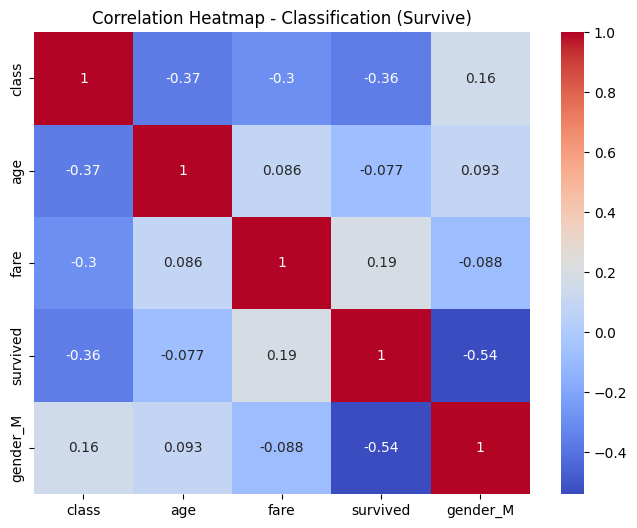

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(classification_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Classification (Survive)')
plt.show()

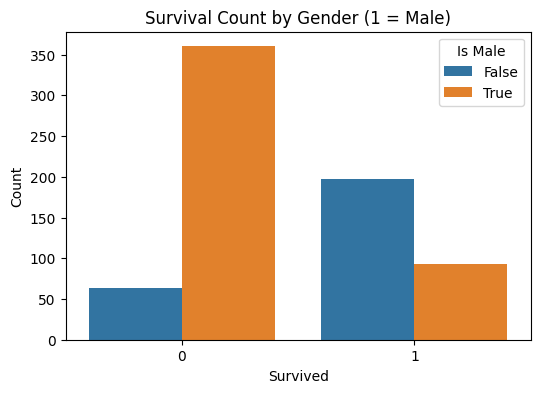

In [ ]:
# 2. Survival Count by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='gender_M', data=classification_df)
plt.title('Survival Count by Gender (1 = Male)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Is Male')
plt.show()

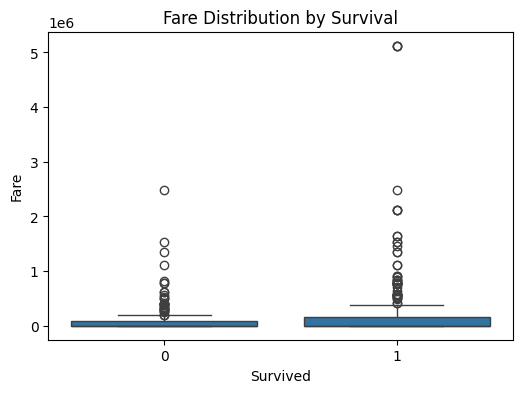

In [ ]:
# 3. Fare distribution by survival status
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='fare', data=classification_df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

### Step 4: Build the Model (Classification - Survive)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. Separate features (X) and target (y)
X = classification_df.drop("survived", axis=1)
y = classification_df["survived"]

# 2. Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = log_model.predict(X_test)

# 5. Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[105  21]
 [ 26  63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       126
           1       0.75      0.71      0.73        89

    accuracy                           0.78       215
   macro avg       0.78      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215



###  Step 5: Put it in Production (Classification - Survive)


In [ ]:
import numpy as np

In [ ]:
# 🔧 Function to use the trained model for predictions
def predict_survival(pclass, age, fare, is_male):

    input_data = np.array([[pclass, age, fare, is_male]])
    prediction = log_model.predict(input_data)
    return prediction[0]



###  Step 6: Test and result (Classification - Survive)


In [ ]:
"""
    Predicts if a passenger would survive based on inputs.

    Parameters:
    - pclass: Passenger class (1, 2, or 3)
    - age: Age of passenger
    - fare: Ticket fare
    - is_male: 1 if male, 0 if female

    Returns:
    - 1 if predicted to survive, 0 if not
    """

  # Predicts if a passenger would survive based on input (3rd class, 22 years old, fare $7.25, male)
result = predict_survival(pclass=3, age=40, fare=7.25, is_male=0)
print("Prediction (1 = Survived, 0 = Did not survive):", result)

Prediction (1 = Survived, 0 = Did not survive): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
